# Introduction into Data Science - Assignment Part II

This is the second part of the assignment in IDS 2023/2024.

This part of the assignment consists of five questions — each of these questions is contained in a separate Jupyter notebook:
- [Question 1: Data Preprocessing](Q1_Preprocessing_Visualization.ipynb)
- [Question 2: Association Rules](Q2_Frequent_Itemsets_Association_Rules.ipynb)
- [Question 3: Process Mining](Q3_Process_Mining.ipynb)
- [Question 4: Text Mining](Q4_Text_Mining.ipynb)
- [Question 5: Big Data](Q5_Big_Data.ipynb)

Additional required files are in two folders.
- [datasets](datasets/)
- [scripts](scripts/)

Please use the provided notebook to work on the questions. When you are done, upload your version of each of the notebooks to Moodle. Your submission will, therefore, consist of five jupyter notebook and _no_ additional file. Any additionally provided files will not be considered in grading.
Enter your commented Python code and answers in the corresponding cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. Please **DO NOT CLEAR THE OUTPUT** of the notebook you are submitting! Additionally, please ensure that the code in the notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the provided slots in each of the notebooks.* If a name or a student id is missing, the student will not receive any points.

Hint 1: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 2: RWTHMoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

Hint 3: As a technical note. Some IDEs such as DataSpell may automatically strip jupyter notebook cell metadata. If you are able, please re-add it from the source notebooks before submission. This is necessary for our grading.

Enter your group number and members with matriculation numbers below.

In [177]:
GROUP_NO = 100 # group number
GROUP_MEMBERS = {
    419866: "Shiyao Ju", # mat. no. : name,
    449970: "Shuo Sun",
    433193: "Yujie Chen",
}

---

In [178]:
# required imports
# do not edit!

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Question 1: Preprocessing and Visualization (19 Points)

**About the Data: Heart Disease**

In this task, our data (`q1_heart_disease.csv`) contains records related to the diagnosis of heart disease in patients. It includes various clinical and non-clinical attributes used to determine the presence or absence of heart disease. Columns cover aspects like patient demographics, vital signs, symptoms, and potential risk factors associated with heart conditions. See below a short description for each column.

| Column         | Description                                                                                                                       |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Age            | The age of the patient in years.                                                                                                  |
| Sex            | The sex of the patient.                                                                                                           |
| ChestPainType  | The type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomnic).                       |
| RestingBP      | The resting blood pressure in millimeter of mercury [mmHg].                                                                       |
| Cholesterol    | The cholesterol of the blood serum in milligrams per deciliter (mg/dl).                                                           |
| FastingBS      | 1 if the blood sugar while fasting is above 120 mg/dl, 0 otherwise.                                                               |
| RestingECG     | Results of the electrocardiogram when resting.                                                                                    |
| MaxHR          | The maximum heart rate achieved while exercising.                                                                                 |
| ExerciseAngina | If an Angina (pressure on chest) is inducible by exercising.                                                                      |
| Oldpeak        | Numerical measure of the depression of the ST segment of electrocardiogram induced by exercise relative to rest.                  |
| ST_Slope       | The slope of the peak exercise ST segment, where 0 corresponds to downsloping; 1 to a flat level, and 2 corresponds to upsloping. |
| HeartDisease   | Heart disease being present or not.                                                                                               |

## Part I: Preprocessing (11 pts)

### a)
First things first. Import the file **q1_heart_disease.csv** and save it into a dataframe named `heart_df`. Visualize the dataframe by showing the first five lines. 


In [179]:
# Import and visualization.

heart_df = pd.read_csv("./datasets/q1_heart_disease.csv")
heart_df.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  40.0   M           ATA      140.0        289.0        0.0     Normal   
1  49.0   F           NAP      160.0        180.0        0.0     Normal   
2  37.0   M           ATA      130.0        283.0        0.0         ST   
3  48.0   F           ASY      138.0        214.0        0.0     Normal   
4  54.0   M           NAP      150.0        195.0        0.0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0  172.0              N      0.0       Up           0.0  
1  156.0              N      1.0     Flat           1.0  
2   98.0              N      0.0       Up           0.0  
3  108.0              Y      1.5     Flat           1.0  
4  122.0              N      0.0       Up           0.0

### b) 
i. Check the data types. Are there any data type problems (e.g., numerical columns having a non-numerical data type)?

In [180]:
# Visualizing data types

heart_df.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

ii. Fix problems, if there are any data type problems. Further, improve categorical columns by setting them to the categorical type and translate boolean columns to boolean values.

In [181]:
# Fixing problems, if necessary

In [182]:
# Set categorical columns to categorial type.

heart_df['Sex'] = heart_df['Sex'].astype('category')
heart_df['ChestPainType'] = heart_df['ChestPainType'].astype('category')
heart_df['RestingECG'] = heart_df['RestingECG'].astype('category')
heart_df['ST_Slope'] = heart_df['ST_Slope'].astype('category')
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].astype('category')

In [183]:
# Translate boolean columns to boolean type

heart_df['FastingBS'] = heart_df['FastingBS'].astype('bool')
heart_df['HeartDisease'] = heart_df['HeartDisease'].astype('bool')

In [184]:
# Checking again by visualizing data types

heart_df.dtypes

Age                float64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS             bool
RestingECG        category
MaxHR              float64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease          bool
dtype: object

### c)
i. In this subtask, we start with a first evaluation of our data by checking the plausibility of some entries. To make sure that we do not have a clash between intended NaN values and existing NaN values in the dataset, we first remove all NaN values. Report the number of rows containing a NaN value.

In [185]:
rows_with_nan_before = heart_df.isnull().any(axis=1).sum()
print(heart_df.shape)
print(f"Number of rows containing NaN values before removing: {rows_with_nan_before}")
heart_df.dropna(inplace=True)
rows_with_nan_after = heart_df.isnull().any(axis=1).sum()
print(heart_df.shape)
print(f"Number of rows containing NaN values after removing: {rows_with_nan_after}")

(923, 12)
Number of rows containing NaN values before removing: 2
(921, 12)
Number of rows containing NaN values after removing: 0


ii. To check plausibility, create boxplots for all numerical features. Reason which features have invalid or missing values. Show and report such outliers. 

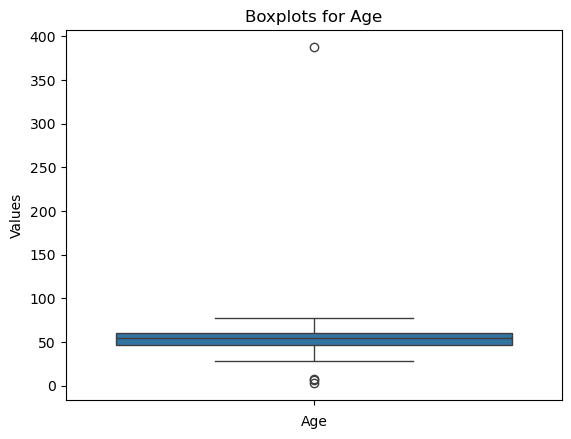

Age
8      7.0
92     6.0
339    3.0
597  388.0

In [186]:
# Creating the boxplot and calculating outliers

sns.boxplot(data=heart_df['Age'])
plt.title('Boxplots for Age')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

q1 = heart_df['Age'].quantile(0.25)
q3 = heart_df['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
outliers_index = heart_df['Age'].index[(heart_df['Age'] < lower_bound) | (heart_df['Age'] > upper_bound)].tolist()

pd.DataFrame({'Age': heart_df.loc[outliers_index, 'Age']})

_Note: There may be more cells than what you may need for viewing and reporting the entries properly and nicely._

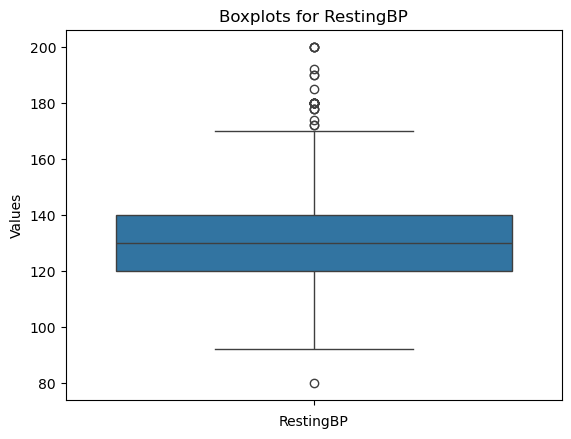

RestingBP
111      190.0
125      180.0
191      180.0
192      180.0
243      200.0
276      180.0
277      180.0
280      180.0
316       80.0
368      200.0
375      185.0
402      200.0
414      180.0
427      180.0
478      178.0
554      172.0
589      180.0
596      190.0
678      174.0
707      178.0
730      180.0
737      200.0
764      192.0
779      178.0
785      180.0
860      180.0
885      172.0

In [187]:
# Potential viewing and reporting of outlier entries

sns.boxplot(data=heart_df['RestingBP'])
plt.title('Boxplots for RestingBP')
plt.xlabel('RestingBP')
plt.ylabel('Values')
plt.show()

q1 = heart_df['RestingBP'].quantile(0.25)
q3 = heart_df['RestingBP'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
outliers_index = heart_df['RestingBP'].index[(heart_df['RestingBP'] < lower_bound) | (heart_df['RestingBP'] > upper_bound)].tolist()
    
pd.DataFrame({'RestingBP': heart_df.loc[outliers_index, 'RestingBP']})

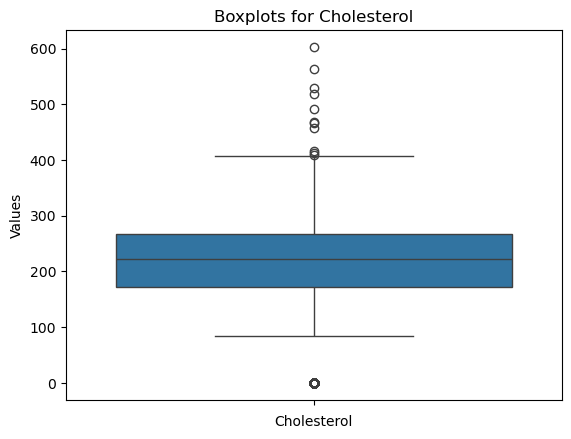

Cholesterol
29         468.0
31         518.0
70         412.0
77         529.0
105        466.0
..           ...
539          0.0
540          0.0
621        564.0
672        417.0
801        409.0

[183 rows x 1 columns]

In [188]:
# Potential viewing and reporting of outlier entries

sns.boxplot(data=heart_df['Cholesterol'])
plt.title('Boxplots for Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Values')
plt.show()

q1 = heart_df['Cholesterol'].quantile(0.25)
q3 = heart_df['Cholesterol'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
outliers_index = heart_df['Cholesterol'].index[(heart_df['Cholesterol'] < lower_bound) | (heart_df['Cholesterol'] > upper_bound)].tolist()
    
pd.DataFrame({'Cholesterol': heart_df.loc[outliers_index, 'Cholesterol']})

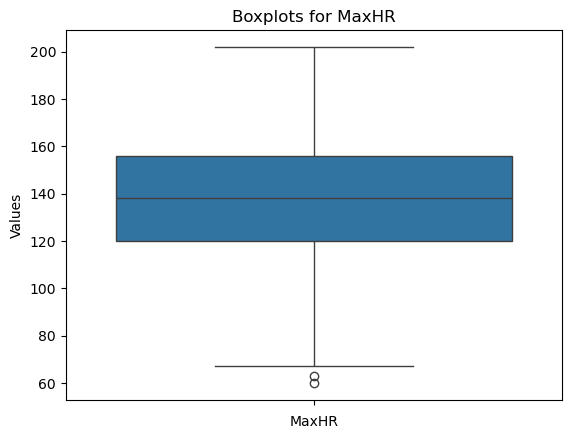

MaxHR
373   63.0
393   60.0

In [189]:
# Potential viewing and reporting of outlier entries

sns.boxplot(data=heart_df['MaxHR'])
plt.title('Boxplots for MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Values')
plt.show()

q1 = heart_df['MaxHR'].quantile(0.25)
q3 = heart_df['MaxHR'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
outliers_index = heart_df['MaxHR'].index[(heart_df['MaxHR'] < lower_bound) | (heart_df['MaxHR'] > upper_bound)].tolist()
    
pd.DataFrame({'MaxHR': heart_df.loc[outliers_index, 'MaxHR']})

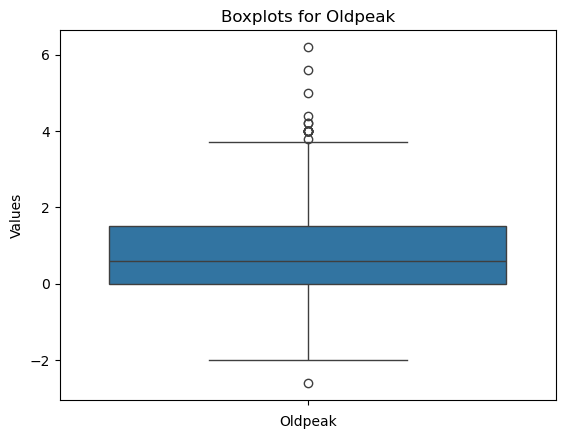

Oldpeak
69       4.0
168      5.0
326     -2.6
503      4.0
525      4.0
541      4.0
563      4.0
629      4.0
707      4.2
737      4.0
776      5.6
780      3.8
796      4.2
855      6.2
905      4.4
913      4.0

In [190]:
# Potential viewing and reporting of outlier entries

sns.boxplot(data=heart_df['Oldpeak'])
plt.title('Boxplots for Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Values')
plt.show()

q1 = heart_df['Oldpeak'].quantile(0.25)
q3 = heart_df['Oldpeak'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
outliers_index = heart_df['Oldpeak'].index[(heart_df['Oldpeak'] < lower_bound) | (heart_df['Oldpeak'] > upper_bound)].tolist()
    
pd.DataFrame({'Oldpeak': heart_df.loc[outliers_index, 'Oldpeak']})

iii. Decide and briefly reason which entries can be kept such that some values can be imputed later and which entries have to be deleted. Apply the preprocessing by either deleting entries or by replacing values that should be imputed by setting their value to NaN respectively. Report for both processings how many entries are effected.

__Student Answer:__ Outliers were found in age and cholesterol. First, it is unlikely that a person's age would be 388 years, and too young an age is unrealistic for the population under investigation, so we treat it as invalid. Second, it is impossible for a person's cholesterol to be zero, and a reasonable explanation is that for some people we are missing cholesterol data, and this part of the data we treat them as missing. So we remove the invalid's Age. Imput the missing cholesterol.

In [191]:
# Potential removing of outliers, reporting their number, and showing of the resulting dataframe

heart_df_dropna = heart_df.copy()

replace_values = [7, 6, 3, 388]
heart_df_dropna[['Age']] = heart_df_dropna[['Age']].replace(replace_values, np.NaN)
heart_df_dropna[['Cholesterol']] = heart_df_dropna[['Cholesterol']].replace(0, np.NaN)
heart_df_dropna = heart_df_dropna.dropna()
dropped_rows_count = heart_df.shape[0] - heart_df_dropna.shape[0]

print("Number of rows:", dropped_rows_count)
print(heart_df_dropna.shape)

Number of rows: 175
(746, 12)


In [192]:
# Potential replacing of values with NaN, reporting their number, and showing of the resulting dataframe

heart_df_replace = heart_df.copy()

replace_values = [7, 6, 3, 388]
heart_df_replace[['Age']] = heart_df_replace[['Age']].replace(replace_values, np.NaN)
heart_df_replace = heart_df_replace.dropna()
heart_df_replace[['Cholesterol']] = heart_df_replace[['Cholesterol']].replace(0, np.NaN)
replaced_rows_count = heart_df.shape[0] - heart_df_replace.shape[0] + heart_df_replace['Cholesterol'].isna().sum()

print("Number of rows:", replaced_rows_count)
print(heart_df_replace.shape)

Number of rows: 175
(917, 12)


iv. To give yourself a better insight, plot the resulting dataframe again using boxplots.

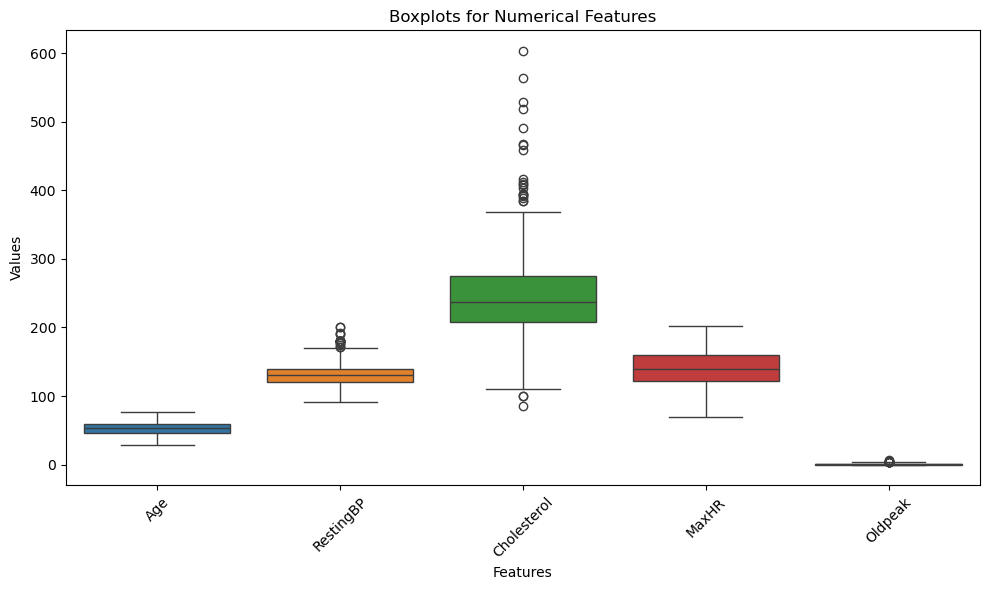

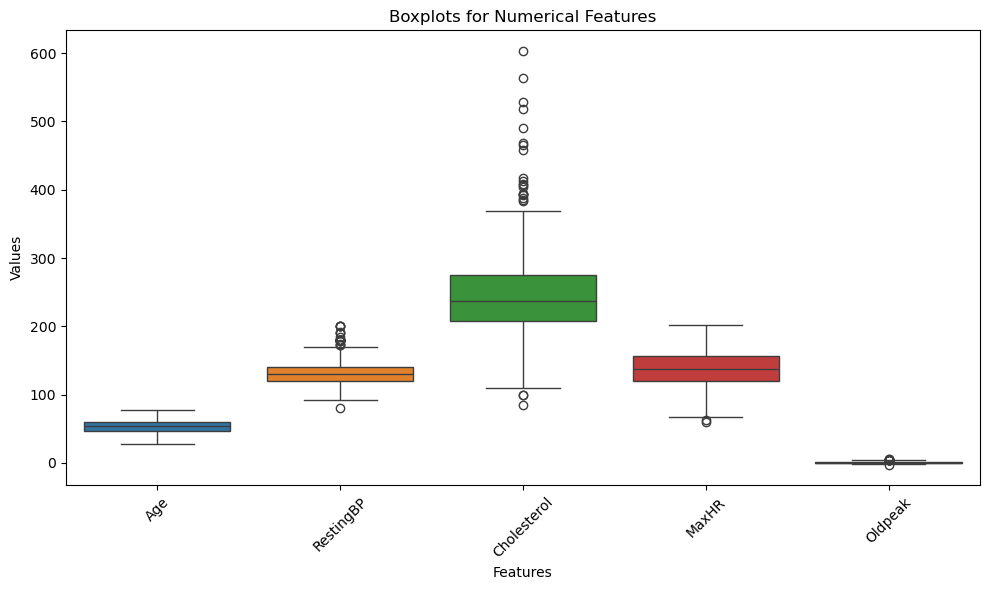

In [193]:
# Creating a boxplot

selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
selected_data = heart_df_dropna[selected_columns]

plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_data)
plt.title('Boxplots for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

selected_data = heart_df_replace[selected_columns]

plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_data)
plt.title('Boxplots for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### d)
i. In this task, we want to impute missing values based on their k-nearest neighbor. Therefore, as a first step, create a reduced dataframe that contains the column(s) with missing values and with columns that correlate with the missing value. Give a brief reasoning and argue about the hypotheses made.

In [194]:
# Creating a dataframe with the values to be imputed and the correlating columns

temp_df = heart_df_replace[['Cholesterol', 'HeartDisease']].copy()

__Student Answer:__ According to a large number of studies, we know that in real life generally cholesterol has positive correlation with heart disease. So that will be the hypotheses we made here.

ii. Next, use k-nearest neighbor imputation with $k = 5$. Impute the missing values. Update the dataframe `heart_df`.

In [195]:
# Applying k-nearest neighbor imputation

knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
temp_df[['Cholesterol']] = knn_imputer.fit_transform(temp_df[['Cholesterol']])
knn_corr = round(temp_df['Cholesterol'].corr(temp_df['HeartDisease']),3)

print(knn_corr)

0.094


In [196]:
# Updating the imputed column(s)

heart_df = heart_df_replace
heart_df[['Cholesterol', 'HeartDisease']] = temp_df

### e)
In this task, we apply one-hot encoding for all categorical and all boolean features. This is used later for visualization. Afterwards, show the resulting dataframe.

In [197]:
# Replacing categorical and boolean features with one-hot encoded columns

heart_df = pd.get_dummies(heart_df, drop_first=False)

heart_df.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0  40.0      140.0        289.0      False  172.0      0.0         False   
1  49.0      160.0        180.0      False  156.0      1.0          True   
2  37.0      130.0        283.0      False   98.0      0.0         False   
3  48.0      138.0        214.0      False  108.0      1.5          True   
4  54.0      150.0        195.0      False  122.0      0.0         False   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...               True             False   
2  False   True              False  ...              False             False   
3   True  False               True  ...              False             False   
4  False   True              False  ...               True             False   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0           False               True          False              True   
1           False               True          False              True   
2           False              False           True              True   
3           False               True          False             False   
4           False               True          False              True   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0             False          False          False         True  
1             False          False           True        False  
2             False          False          False         True  
3              True          False           True        False  
4             False          False          False         True  

[5 rows x 21 columns]

## Part II: Advanced Visualization (8 pts)

In this question, we continue using the preprocessed data from Part I.

### a)
In this task, visualize the relation by plotting each pair of numerical features. Visualize the instances in the pairplots of those individuals that have and that do not have heart disease.

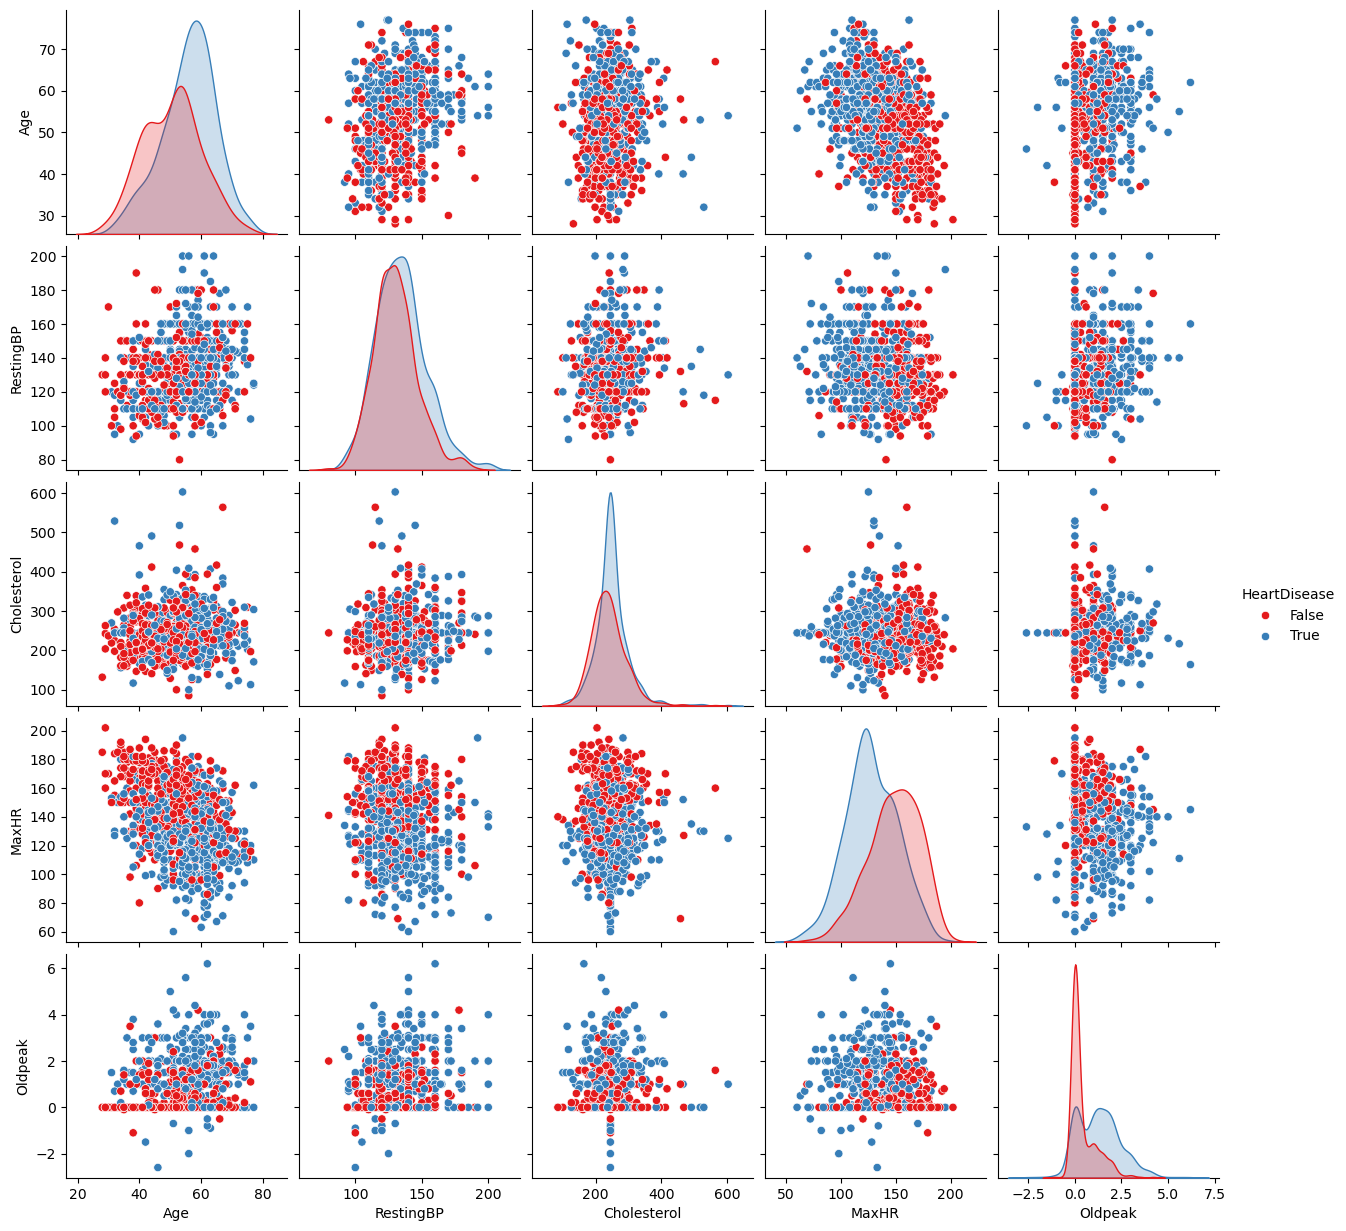

In [198]:
# Visualizing the relation between the numerical values using a pairplot, where the entries are classified by whether a heart disease is present 

df = heart_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']].copy()
sns.pairplot(data=df, hue='HeartDisease', palette='Set1')

### b)
i. Having the pairplot, we are interested in more details on the relation between the age of a patient and maximum heart rate. Therefore, create plot that shows the regression line between both features.

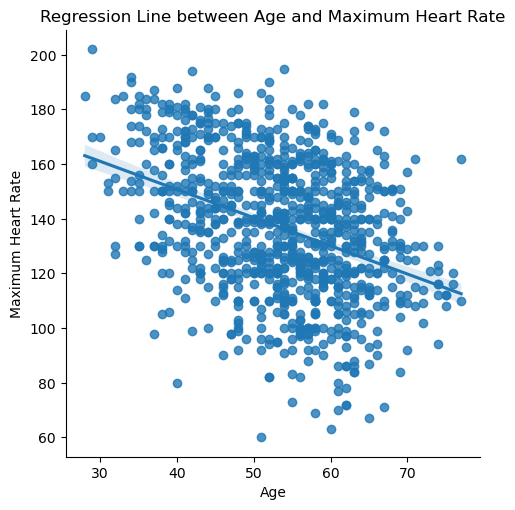

In [199]:
# Plotting age and maximum heart rate with regression line

sns.lmplot(x='Age', y='MaxHR', data=heart_df)
plt.title('Regression Line between Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

ii. Given our evaluation from task b-i), we are not sure if Simpson's Paradox occurs or not. Give some short reasoning, and if needed, do some experiment to check whether Simpson's Paradox occurs.

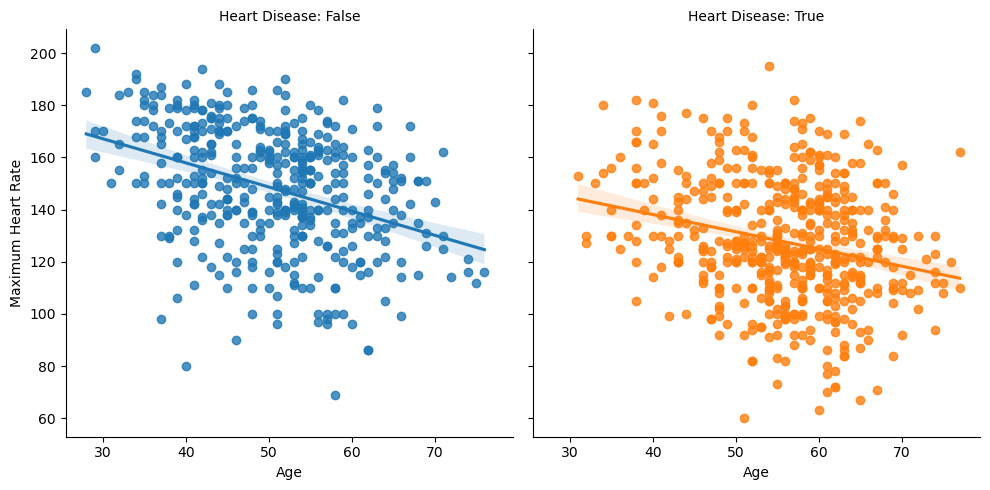

In [200]:
# Potential code for Simpson's Paradox testing

g = sns.lmplot(x='Age', y='MaxHR', hue='HeartDisease', data=heart_df, col='HeartDisease')
g.set_titles('Heart Disease: {col_name}')
g.set_axis_labels('Age', 'Maximum Heart Rate')
plt.show()

__Student Answer:__ Simpson's Paradox may occur because when the sample sizes of the different subgroups are not balanced, a small sample may have a larger impact on the overall trend. With the graph above we can see that the samples are balanced in terms of the size of the different subgroups. The trends that emerge are the same as when the overall analysis of the total is done. So Simpson's paradox does not appear.

### c)
In this task, we want to obtain a deeper understanding of the characteristics of each state of the former categorical or boolean features. Therefore, we create a heatmap that can be used to get a first impression of which value of which feature correlates with each other feature. 

i. Create a dataframe that contains as its columns the feature states and as its index all the column names of `heart_df`. Each entry is the sum of entries that have such a combination of features being true for the one-hot encoded features. For example, given the entries:
| ID | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|----|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1  | True          | False          | True            | False           | False           | True            | False           |
| 2  | True          | False          | False           | True            | False           | True            | False           |
| 3  | False         | True           | False           | True            | False           | True            | False           |

In this example, we would obtain the following entries as a result:

|                 | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|-----------------|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| Feature1_True   | 2             | 0              | 1               | 1               | 0               | 2               | 0               |
| Feature1_False  | 0             | 1              | 0               | 1               | 0               | 1               | 0               |
| Feature2_StateA | 1             | 0              | 1               | 0               | 0               | 1               | 0               |
| Feature2_StateB | 1             | 1              | 0               | 2               | 0               | 2               | 0               |
| Feature2_StateC | 0             | 0              | 0               | 0               | 0               | 0               | 0               |
| Feature3_StateA | 2             | 1              | 1               | 2               | 0               | 3               | 0               |
| Feature3_StateB | 0             | 0              | 0               | 0               | 0               | 0               | 0               |

In [201]:
# Creating the data for the heatmap.

one_hot_features = heart_df[['FastingBS', 'HeartDisease','Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA','RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']]

sums_df = pd.DataFrame()

for feature_row in one_hot_features:
    for feature_col in one_hot_features:
        count = (heart_df[heart_df[feature_row] == 1][feature_col] == 1).sum()
        sums_df.loc[feature_row, feature_col] = count

display(sums_df)

FastingBS  HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  \
FastingBS              214.0         170.0   26.0  188.0              141.0   
HeartDisease           170.0         507.0   50.0  457.0              392.0   
Sex_F                   26.0          50.0  193.0    0.0               70.0   
Sex_M                  188.0         457.0    0.0  724.0              426.0   
ChestPainType_ASY      141.0         392.0   70.0  426.0              496.0   
ChestPainType_ATA       19.0          24.0   60.0  113.0                0.0   
ChestPainType_NAP       41.0          71.0   53.0  149.0                0.0   
ChestPainType_TA        13.0          20.0   10.0   36.0                0.0   
RestingECG_LVH          42.0         106.0   47.0  141.0              102.0   
RestingECG_Normal      111.0         284.0  118.0  433.0              284.0   
RestingECG_ST           61.0         117.0   28.0  150.0              110.0   
ExerciseAngina_N       116.0         191.0  150.0  396.0              199.0   
ExerciseAngina_Y        98.0         316.0   43.0  328.0              297.0   
ST_Slope_Down           25.0          49.0    7.0   56.0               46.0   
ST_Slope_Flat          128.0         380.0   75.0  384.0              318.0   
ST_Slope_Up             61.0          78.0  111.0  284.0              132.0   

                   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
FastingBS                       19.0               41.0              13.0   
HeartDisease                    24.0               71.0              20.0   
Sex_F                           60.0               53.0              10.0   
Sex_M                          113.0              149.0              36.0   
ChestPainType_ASY                0.0                0.0               0.0   
ChestPainType_ATA              173.0                0.0               0.0   
ChestPainType_NAP                0.0              202.0               0.0   
ChestPainType_TA                 0.0                0.0              46.0   
RestingECG_LVH                  23.0               47.0              16.0   
RestingECG_Normal              123.0              122.0              22.0   
RestingECG_ST                   27.0               33.0               8.0   
ExerciseAngina_N               156.0              151.0              40.0   
ExerciseAngina_Y                17.0               51.0               6.0   
ST_Slope_Down                    3.0               10.0               4.0   
ST_Slope_Flat                   32.0               87.0              22.0   
ST_Slope_Up                    138.0              105.0              20.0   

                   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
FastingBS                    42.0              111.0           61.0   
HeartDisease                106.0              284.0          117.0   
Sex_F                        47.0              118.0           28.0   
Sex_M                       141.0              433.0          150.0   
ChestPainType_ASY           102.0              284.0          110.0   
ChestPainType_ATA            23.0              123.0           27.0   
ChestPainType_NAP            47.0              122.0           33.0   
ChestPainType_TA             16.0               22.0            8.0   
RestingECG_LVH              188.0                0.0            0.0   
RestingECG_Normal             0.0              551.0            0.0   
RestingECG_ST                 0.0                0.0          178.0   
ExerciseAngina_N            115.0              344.0           87.0   
ExerciseAngina_Y             73.0              207.0           91.0   
ST_Slope_Down                17.0               31.0           15.0   
ST_Slope_Flat                97.0              265.0           97.0   
ST_Slope_Up                  74.0              255.0           66.0   

                   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
FastingBS                     116.0              98.0           25.0   
HeartDisease 

ii. Next, create the heatmap based on the data from the last subtask. If necessary, improve readability of the visualization.

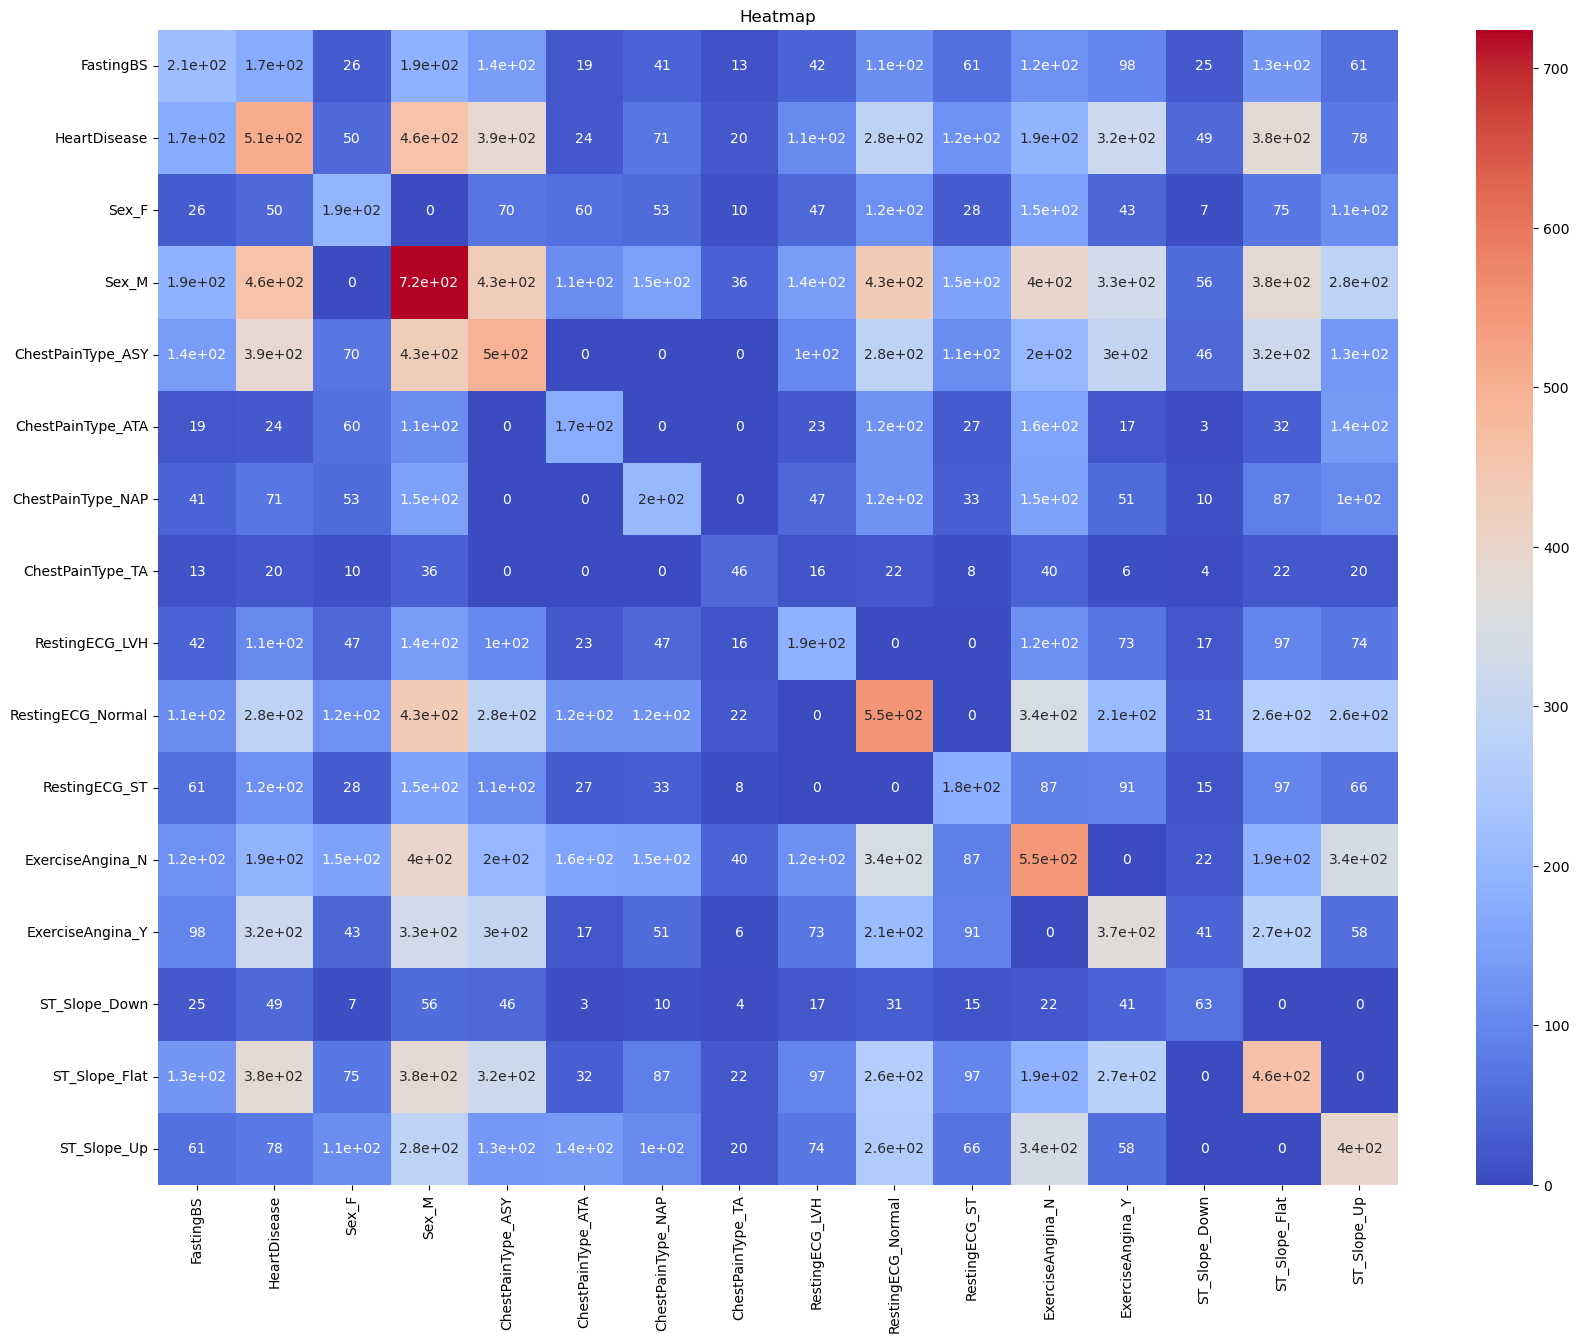

In [202]:
# Visualizing the obtained heatmap

plt.figure(figsize=(20, 15))
sns.heatmap(sums_df, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

Given the heatmap, briefly derive some insights towards the different values of a feature. I.e., you may choose a heart disease being present or not and argue about what correlates for the other features for each value.

__Student Answer:__ From the heatmap we can see that majority of patients are male, majority of patients have FastingBS less or equal then 120mg/dl, majority of patients have asymptomatic chest pain type, majority of patients have flat ST Slope.